In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import os
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from sklearn.preprocessing import MinMaxScaler
import pathlib
import sys

cwd = pathlib.Path().resolve()
src = cwd.parent
root = src.parent
sys.path.append(str(src))

from models.RNN import *
from utils.simulation import Simulation
from training.train import train_and_validate, evaluate_model

In [2]:
#initialize GPU -  In case of windows use cuda instead of mps
device = torch.device('mps')


grid_size = 64

In [3]:
def create_sequences(series,T=1,H=1):
    # This function creates a dataset of input/output sequences from a time series.
    # The input sequence is T steps long, from time t to time t+T (excluded).
    # The output sequence is H steps long, from time t+T to time t+T+H (excluded).
    X = []
    Y = []
    for t in range(len(series)-T-H):
        x = series[t:t+T]
        X.append(x)
        y = series[t+T:t+T+H]
        Y.append(y)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [4]:
sim = Simulation.load_simulation(str(root)+"/data/processed_data/normalized_training_data", 2, grid_size)

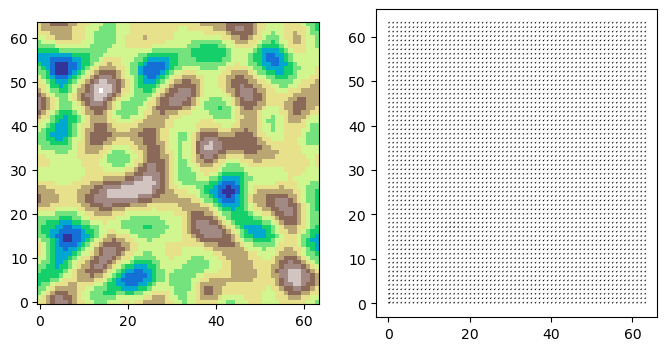

In [5]:
fig = sim.plot_vector(96)

In [6]:
X = np.zeros((96, 4096))
Y = np.zeros((96, 4096))

topography = sim.topography

for t_i in range(len(X)):
    wd, vx, vy = sim.return_timestep(t_i)
    X[t_i] = wd.reshape(-1)

    wd_vx_vy = sim.return_timestep(t_i+1)
    Y[t_i] = wd.reshape(-1)

training_size = 0.8
id_training = int(training_size * len(X))

X_tra = X[:id_training, :]
Y_tra = Y[:id_training, :]

X_val = X[id_training:, :]
Y_val = Y[id_training:, :]
# print(np.count_nonzero(X_tra[95]))
print(X_tra.shape)
print(Y_tra.shape)
print(X_val.shape)
print(Y_val.shape)

(76, 4096)
(76, 4096)
(20, 4096)
(20, 4096)


In [7]:
from torch.utils.data import TensorDataset, DataLoader

In [8]:

train_dataset = TensorDataset(torch.tensor(X_tra, dtype=torch.float32), torch.tensor(Y_tra, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(Y_val, dtype=torch.float32))

In [9]:
# # Instantiate the model with hyperparameters
# model = RNN_floods(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
# # We'll also set the model to the device that we defined earlier (default is CPU)
# model.to(device)

# # Define hyperparameters
# n_epochs = 100
# lr=0.01

# # Define Loss, Optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [10]:
batch_size = 2**2      # You can modify this based on your requirements

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [11]:
num_epochs = 200
lr = 0.0005

In [12]:
import torch.optim as optim

In [13]:
babies_first_model = SimpleRNN(128, 4096).to(device)

In [14]:
# Loss function
criterion = nn.MSELoss()  # Or another appropriate loss function

optimizer = optim.AdamW(babies_first_model.parameters(), lr=lr)
save_path_MLP = '../trained_models/RNN/RNN_v2.pth'

In [15]:
import time

In [16]:
train_losses_MLP, val_losses_MLP, best_val_loss_MLP, time_MLP = train_and_validate(babies_first_model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_path_MLP)

RuntimeError: Parent directory ../trained_models/RNN does not exist.